In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Schonels Modified Final.csv to Schonels Modified Final.csv


In [12]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Schonels Modified Final.csv']))

In [13]:
data.head(20)

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
0,5,0,60,F,0,5,0,60,0,Neutral
1,5,0,60,F,1,5,1,61,1,Good
2,5,0,60,F,2,5,2,62,2,Good
3,5,0,60,F,3,5,3,63,3,Good
4,5,0,60,F,4,5,4,64,4,Good
5,5,0,60,F,5,5,5,65,5,Good
6,5,0,60,F,6,5,6,66,6,Well
7,5,0,60,F,7,5,7,67,7,Well
8,5,0,60,F,8,5,8,68,8,Well
9,5,0,60,F,9,5,9,69,9,Well


In [14]:
data.shape

(33936, 10)

In [15]:
data = data.fillna(data.mean())

In [16]:
data.cov()

,BAY,BAM,BTM,Score,SAY,SAM,STM,Diff
BAY,1.625048e+01,0.000000e+00,1.950057e+02,0.000000,-6.281503e-17,-3.350135e-18,1.996681e-15,-195.005746
BAM,0.000000e+00,1.191702e+01,1.191702e+01,0.000000,-1.587755e-15,1.358899e-16,3.464710e-14,-11.917018
BTM,1.950057e+02,1.191702e+01,2.351986e+03,0.000000,-2.010081e-16,-1.038542e-16,1.195328e-14,-2351.985973
Score,0.000000e+00,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00,1.018842e+03,1018.841904
SAY,-6.281503e-17,-1.587755e-15,-2.010081e-16,84.408428,8.465106e+00,-2.426304e-01,1.013386e+02,101.338640
SAM,-3.350135e-18,1.358899e-16,-1.038542e-16,5.940769,-2.426304e-01,8.367073e+00,5.455508e+00,5.455508
STM,1.996681e-15,3.464710e-14,1.195328e-14,1018.841904,1.013386e+02,5.455508e+00,1.221519e+03,1221.519183
Diff,-1.950057e+02,-1.191702e+01,-2.351986e+03,1018.841904,1.013386e+02,5.455508e+00,1.221519e+03,3573.505156


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33936 entries, 0 to 33935
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BAY     33936 non-null  int64 
 1   BAM     33936 non-null  int64 
 2   BTM     33936 non-null  int64 
 3   Gender  33936 non-null  object
 4   Score   33936 non-null  int64 
 5   SAY     33936 non-null  int64 
 6   SAM     33936 non-null  int64 
 7   STM     33936 non-null  int64 
 8   Diff    33936 non-null  int64 
 9   SLD     33936 non-null  object
dtypes: int64(8), object(2)
memory usage: 2.6+ MB


In [18]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(exclude="int64").columns
print(CateList)

Index(['Gender', 'SLD'], dtype='object')


In [19]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [20]:
print(LE.classes_)

['Good' 'Mild' 'Neutral' 'Severe' 'Well']


In [21]:
data.head(30)

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
0,5,0,60,0,0,5,0,60,0,2
1,5,0,60,0,1,5,1,61,1,0
2,5,0,60,0,2,5,2,62,2,0
3,5,0,60,0,3,5,3,63,3,0
4,5,0,60,0,4,5,4,64,4,0
5,5,0,60,0,5,5,5,65,5,0
6,5,0,60,0,6,5,6,66,6,4
7,5,0,60,0,7,5,7,67,7,4
8,5,0,60,0,8,5,8,68,8,4
9,5,0,60,0,9,5,9,69,9,4


In [22]:
data.describe()

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
count,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000
mean,11.500000,5.500000,143.500000,0.500000,50.000000,9.554455,4.455446,119.108911,-24.391089,3.170851
std,4.031188,3.452103,48.497278,0.500007,29.155189,2.909485,2.892589,34.950239,59.778802,0.823828
min,5.000000,0.000000,60.000000,0.000000,0.000000,5.000000,0.000000,60.000000,-167.000000,0.000000
25%,8.000000,2.750000,101.750000,0.000000,25.000000,7.000000,2.000000,89.000000,-68.000000,3.000000
50%,11.500000,5.500000,143.500000,0.500000,50.000000,10.000000,4.000000,120.000000,-24.000000,3.000000
75%,15.000000,8.250000,185.250000,1.000000,75.000000,12.000000,7.000000,149.000000,19.000000,4.000000
max,18.000000,11.000000,227.000000,1.000000,100.000000,15.000000,9.000000,180.000000,120.000000,4.000000


In [23]:
data.cov()

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
BAY,1.625048e+01,0.000000e+00,1.950057e+02,0.000000e+00,0.000000,-6.281503e-17,-3.350135e-18,1.996681e-15,-1.950057e+02,-9.252100e-01
BAM,0.000000e+00,1.191702e+01,1.191702e+01,0.000000e+00,0.000000,-1.587755e-15,1.358899e-16,3.464710e-14,-1.191702e+01,-4.269928e-02
BTM,1.950057e+02,1.191702e+01,2.351986e+03,0.000000e+00,0.000000,-2.010081e-16,-1.038542e-16,1.195328e-14,-2.351986e+03,-1.114522e+01
Gender,0.000000e+00,0.000000e+00,0.000000e+00,2.500074e-01,0.000000,-3.004652e-17,7.851879e-20,-1.620628e-16,-6.968281e-16,1.423807e-17
Score,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00,1.018842e+03,1.018842e+03,5.892441e+00
SAY,-6.281503e-17,-1.587755e-15,-2.010081e-16,-3.004652e-17,84.408428,8.465106e+00,-2.426304e-01,1.013386e+02,1.013386e+02,5.871008e-01
SAM,-3.350135e-18,1.358899e-16,-1.038542e-16,7.851879e-20,5.940769,-2.426304e-01,8.367073e+00,5.455508e+00,5.455508e+00,2.143294e-02
STM,1.996681e-15,3.464710e-14,1.195328e-14,-1.620628e-16,1018.841904,1.013386e+02,5.455508e+00,1.221519e+03,1.221519e+03,7.066643e+00
Diff,-1.950057e+02,-1.191702e+01,-2.351986e+03,-6.968281e-16,1018.841904,1.013386e+02,5.455508e+00,1.221519e+03,3.573505e+03,1.821186e+01
SLD,-9.252100e-01,-4.269928e-02,-1.114522e+01,1.423807e-17,5.892441,5.871008e-01,2.143294e-02,7.066643e+00,1.821186e+01,6.786918e-01


In [24]:
corr = data.corr()

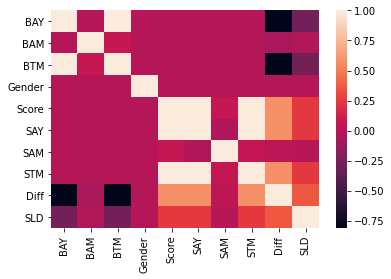

In [25]:
sns.heatmap(corr)

In [26]:
import sympy 

In [27]:
reduced_form, inds = sympy.Matrix(data.values).rref()
reduced_form

Matrix([
[1, 0, 12, 0, 0, 0, 0,  0, -12, 0],
[0, 1,  1, 0, 0, 0, 0,  0,  -1, 0],
[0, 0,  0, 1, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 1, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 1, 0, 12,  12, 0],
[0, 0,  0, 0, 0, 0, 1,  1,   1, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 1],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0,

In [28]:
inds

(0, 1, 3, 4, 5, 6, 9)

In [29]:
inds = list(inds)
inds

[0, 1, 3, 4, 5, 6, 9]

In [30]:
for i in range(10):
    if(i not in inds):
        print(data.columns[i])

BTM
STM
Diff


In [31]:
data = data.drop(['BTM','STM','Diff'], axis = 1) 

In [32]:
data.head(20)

,BAY,BAM,Gender,Score,SAY,SAM,SLD
0,5,0,0,0,5,0,2
1,5,0,0,1,5,1,0
2,5,0,0,2,5,2,0
3,5,0,0,3,5,3,0
4,5,0,0,4,5,4,0
5,5,0,0,5,5,5,0
6,5,0,0,6,5,6,4
7,5,0,0,7,5,7,4
8,5,0,0,8,5,8,4
9,5,0,0,9,5,9,4


In [33]:
data.cov()

,BAY,BAM,Gender,Score,SAY,SAM,SLD
BAY,1.625048e+01,0.000000e+00,0.000000e+00,0.000000,-6.281503e-17,-3.350135e-18,-9.252100e-01
BAM,0.000000e+00,1.191702e+01,0.000000e+00,0.000000,-1.587755e-15,1.358899e-16,-4.269928e-02
Gender,0.000000e+00,0.000000e+00,2.500074e-01,0.000000,-3.004652e-17,7.851879e-20,1.423807e-17
Score,0.000000e+00,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00,5.892441e+00
SAY,-6.281503e-17,-1.587755e-15,-3.004652e-17,84.408428,8.465106e+00,-2.426304e-01,5.871008e-01
SAM,-3.350135e-18,1.358899e-16,7.851879e-20,5.940769,-2.426304e-01,8.367073e+00,2.143294e-02
SLD,-9.252100e-01,-4.269928e-02,1.423807e-17,5.892441,5.871008e-01,2.143294e-02,6.786918e-01


In [34]:
data.cov()

,BAY,BAM,Gender,Score,SAY,SAM,SLD
BAY,1.625048e+01,0.000000e+00,0.000000e+00,0.000000,-6.281503e-17,-3.350135e-18,-9.252100e-01
BAM,0.000000e+00,1.191702e+01,0.000000e+00,0.000000,-1.587755e-15,1.358899e-16,-4.269928e-02
Gender,0.000000e+00,0.000000e+00,2.500074e-01,0.000000,-3.004652e-17,7.851879e-20,1.423807e-17
Score,0.000000e+00,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00,5.892441e+00
SAY,-6.281503e-17,-1.587755e-15,-3.004652e-17,84.408428,8.465106e+00,-2.426304e-01,5.871008e-01
SAM,-3.350135e-18,1.358899e-16,7.851879e-20,5.940769,-2.426304e-01,8.367073e+00,2.143294e-02
SLD,-9.252100e-01,-4.269928e-02,1.423807e-17,5.892441,5.871008e-01,2.143294e-02,6.786918e-01


In [35]:
data = data.drop(['Gender'], axis = 1) 

In [36]:
data.head(20)

,BAY,BAM,Score,SAY,SAM,SLD
0,5,0,0,5,0,2
1,5,0,1,5,1,0
2,5,0,2,5,2,0
3,5,0,3,5,3,0
4,5,0,4,5,4,0
5,5,0,5,5,5,0
6,5,0,6,5,6,4
7,5,0,7,5,7,4
8,5,0,8,5,8,4
9,5,0,9,5,9,4


In [37]:
corr = data.corr()

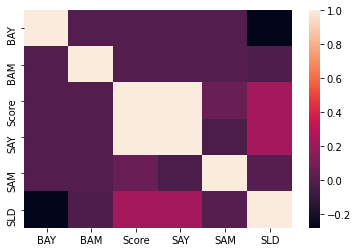

In [38]:
sns.heatmap(corr)

In [39]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [40]:
data.head()

,BAY,BAM,Score,SAM,SLD
0,5,0,0,0,2
1,5,0,1,1,0
2,5,0,2,2,0
3,5,0,3,3,0
4,5,0,4,4,0


In [41]:
data = data.drop(['SAM'], axis = 1) 

In [42]:
data.shape

(33936, 4)

In [43]:
data = data.drop_duplicates()

In [44]:
data.shape

(16968, 4)

In [45]:
data.head()

,BAY,BAM,Score,SLD
0,5,0,0,2
1,5,0,1,0
2,5,0,2,0
3,5,0,3,0
4,5,0,4,0


In [46]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,BAY,BAM,Score,SLD
0,11,5,88,4
1,12,2,64,3
2,14,1,18,3
3,13,3,90,4
4,11,11,16,3


In [47]:
X=data.drop(['SLD'],axis=1).values
y=data['SLD'].values
print(X.shape, y.shape)

(16968, 3) (16968,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [49]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(12726, 3) (12726,)
(4242, 3) (4242,)


In [50]:
from keras.utils import to_categorical

In [51]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

In [52]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12726, 3) (12726, 5)
(4242, 3) (4242, 5)


In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [54]:
input_dim = X.shape[1]
model = Sequential()
model.add(Dense(75, activation='relu', input_dim=input_dim))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 75)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               7600      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 8,405
Trainable params: 8,405
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(X, y,
                    epochs=100,
                    verbose=True,
                    batch_size = 128)

Epoch 1/100
133/133 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.8343
Epoch 2/100
133/133 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8950
Epoch 3/100
133/133 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.9027
Epoch 4/100
133/133 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.9124
Epoch 5/100
133/133 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9164
Epoch 6/100
133/133 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9242
Epoch 7/100
133/133 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9319
Epoch 8/100
133/133 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9379
Epoch 9/100
133/133 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9370
Epoch 10/100
133/133 [==============================] - 0s 2ms/step - loss: 0.1573 - accura

In [56]:
loss, accuracy = model.evaluate(X, y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9932


In [57]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    #plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    #plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training Loss')
    plt.legend()

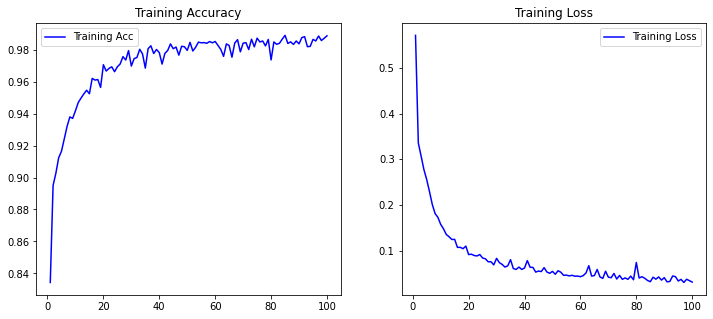

In [58]:
plot_history(history)

In [59]:
pred = model.predict([[10,3,31]])
classes = pred[0]
print(classes)
print(len(classes))
final=np.where(classes==max(classes))

[2.2773842e-32 4.9167098e-12 3.8076695e-22 1.0000000e+00 0.0000000e+00]
5


In [60]:
print(final)

(array([3]),)


In [61]:
if(final[0]==0):
    print("Good")
elif(final[0]==1):
    print("Mild")
elif(final[0]==2):
    print("Neutral")
elif(final[0]==3):
    print("Severe")
elif(final[0]==4):
    print("Well")    

Severe
